In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bioservices.kegg import KEGG
import re
from scipy.stats import pearsonr

# Load excel file

In [104]:
df_min = pd.read_excel("data/All Quantified Genes .xlsx", sheet_name='All Quantified Genes plus min')

# add a column for -log(FDR)
df_min['-log_FDR'] = -np.log(df_min.FDR)

# add a column for significant genes
df_min['Significance'] = False
df_min.loc[df_min.FDR<=0.05, 'Significance'] = True

df_min.head()

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,48-plusmin,45-plusmin,-log_FDR,Significance
0,DHDMEDEN_00001,dnaA,Chromosomal replication initiator protein DnaA,CDS,0.727527,0.082521,0.163785,379.473666,161.824886,458.761569,437.484473,1.809200,False
1,DHDMEDEN_00003,dnaN,Beta sliding clamp,CDS,0.456401,0.038402,0.094938,336.394158,267.583433,443.583758,385.139248,2.354536,False
2,DHDMEDEN_00004,recF_1,DNA replication and repair protein RecF,CDS,0.506902,0.086779,0.169991,85.743456,49.952376,98.704730,94.094982,1.772010,False
3,DHDMEDEN_00005,gyrB,DNA gyrase subunit B,CDS,0.562851,0.051242,0.116983,990.690146,671.365143,1224.212836,1230.940555,2.145728,False
4,DHDMEDEN_00006,yidA,Sugar phosphatase YidA,CDS,1.545342,0.001696,0.012520,52.845119,54.310201,142.345016,170.430514,4.380466,True


## mntA

In [131]:
df_min[(df_min.Gene.notnull()) & (df_min.Gene.str.contains('mntA'))].sort_values('logFC')

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,48-plusmin,45-plusmin,-log_FDR,Significance
1120,DHDMEDEN_01141,mntA_1,Manganese-binding lipoprotein MntA,CDS,-1.091213,0.005291,0.025149,6.441148,5.463541,2.872360,2.709069,3.682933,True
1760,DHDMEDEN_01802,mntA_2,Manganese-binding lipoprotein MntA,CDS,-0.301987,0.467469,0.586940,1.731491,1.430927,1.664663,0.903023,0.532832,False


## mntB

In [105]:
df_min[(df_min.Gene.notnull()) & (df_min.Gene.str.contains('mntB'))].sort_values('logFC')

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,48-plusmin,45-plusmin,-log_FDR,Significance
1751,DHDMEDEN_01793,mntB_8,Manganese transport system ATP-binding protein...,CDS,-0.409349,0.186736,0.298625,6.371889,4.552951,3.427248,4.786021,1.208568,False
1118,DHDMEDEN_01139,mntB_4,Manganese transport system ATP-binding protein...,CDS,-0.384954,0.528576,0.644071,1.939270,0.845548,1.436180,0.692318,0.439946,False
1749,DHDMEDEN_01791,mntB_6,Manganese transport system membrane protein MntB,CDS,-0.298803,0.345308,0.468484,2.908906,3.056981,1.893146,2.949875,0.758254,False
1750,DHDMEDEN_01792,mntB_7,Manganese transport system membrane protein MntB,CDS,-0.235871,0.531619,0.646569,3.462983,2.471602,1.925787,3.100378,0.436075,False
1119,DHDMEDEN_01140,mntB_5,Manganese transport system membrane protein MntB,CDS,0.259983,0.577655,0.687979,1.870011,1.300843,1.925787,1.866247,0.373996,False
1069,DHDMEDEN_01089,mntB_2,Manganese transport system membrane protein MntB,CDS,2.005814,0.001263,0.010601,17.868992,34.277217,128.048498,81.512863,4.546779,True
1068,DHDMEDEN_01088,mntB_1,Manganese transport system membrane protein MntB,CDS,2.029015,0.004540,0.023059,13.574893,32.781247,117.538272,71.820418,3.769709,True
1070,DHDMEDEN_01090,mntB_3,Manganese transport system ATP-binding protein...,CDS,2.591997,0.000511,0.006205,24.171621,40.976559,250.417557,142.557208,5.082434,True


## mntC

In [132]:
df_min[(df_min.Gene.notnull()) & (df_min.Gene.str.contains('mntC'))].sort_values('logFC')

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,48-plusmin,45-plusmin,-log_FDR,Significance
1761,DHDMEDEN_01803,mntC,Manganese transport system membrane protein MntC,CDS,0.298653,0.583417,0.692889,0.969635,0.715464,0.554888,1.505038,0.366886,False


# Volcano plot

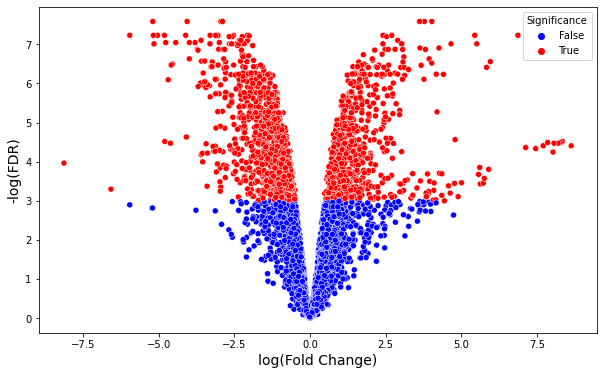

In [106]:
fig, ax = plt.subplots(figsize=(10,6))

_ = sns.scatterplot(x='logFC', y='-log_FDR', hue='Significance', ax=ax, data=df_min, palette={False:'blue', True:'red'})
_ = ax.set_xlabel('log(Fold Change)', fontsize=14)
_ = ax.set_ylabel('-log(FDR)', fontsize=14)

# Select top candidates

## downregulation

In [107]:
df_min[(df_min.logFC<=-1) & (df_min.FDR<0.05)].sort_values('FDR')

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,48-plusmin,45-plusmin,-log_FDR,Significance
4380,DHDMEDEN_04483,lsrB_2,Autoinducer 2-binding protein LsrB,CDS,-2.888164,4.177601e-07,0.000508,189.771463,186.475864,23.990733,26.819779,7.584679,True
5649,DHDMEDEN_05812,NaN,hypothetical protein,CDS,-5.192454,5.990374e-07,0.000508,171.348394,116.490503,3.492528,4.364610,7.584679,True
2540,DHDMEDEN_02601,metC_3,Cystathionine beta-lyase MetC,CDS,-2.943608,6.069347e-07,0.000508,435.712508,486.970628,64.301693,55.626208,7.584679,True
5748,DHDMEDEN_05913,traA_2,Pilin,CDS,-4.058962,6.002615e-07,0.000508,873.225767,1013.682014,62.996075,50.208071,7.584679,True
5650,DHDMEDEN_05813,NaN,hypothetical protein,CDS,-5.172740,1.378498e-06,0.000724,100.703543,61.009543,2.154270,2.317759,7.230227,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,DHDMEDEN_04218,gspH,Putative type II secretion system protein H,CDS,-1.171899,1.431070e-02,0.048705,1.800751,2.601686,1.142416,0.812721,3.021967,True
180,DHDMEDEN_00183,NaN,IS1 family transposase ISKpn14,CDS,-1.089669,1.435826e-02,0.048729,10.735247,6.244047,3.721012,4.244207,3.021485,True
1382,DHDMEDEN_01417,NaN,hypothetical protein,CDS,-1.101352,1.453282e-02,0.049122,185.754402,105.108125,63.485681,72.061224,3.013457,True
1711,DHDMEDEN_01750,NaN,hypothetical protein,CDS,-1.713266,1.470318e-02,0.049606,8.934496,28.813675,4.765506,6.742571,3.003653,True


## upregulation

In [108]:
df_min[(df_min.logFC>=1) & (df_min.FDR<0.05)].sort_values('FDR')

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,48-plusmin,45-plusmin,-log_FDR,Significance
4466,DHDMEDEN_04576,mgtA,"Magnesium-transporting ATPase, P-type 1",CDS,3.619589,3.292838e-07,0.000508,31.305365,24.781062,320.627171,368.764433,7.584679,True
4253,DHDMEDEN_04353,nhaR,Transcriptional activator protein NhaR,CDS,4.022894,1.709076e-07,0.000508,67.805205,77.595293,1119.110577,1244.726704,7.584679,True
194,DHDMEDEN_00197,yheS_1,putative ABC transporter ATP-binding protein YheS,CDS,3.776118,3.274977e-07,0.000508,21.193455,18.276846,277.509133,263.291364,7.584679,True
5795,DHDMEDEN_05963,NaN,hypothetical protein,CDS,2.700855,2.070508e-06,0.000724,54.507351,68.294265,373.733189,424.812052,7.230227,True
4254,DHDMEDEN_04354,nhaA_1,Na(+)/H(+) antiporter NhaA,CDS,5.440780,1.355944e-06,0.000724,80.202684,61.139627,2935.976120,3203.292976,7.230227,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5712,DHDMEDEN_05875,NaN,IS1 family transposase IS1D,CDS,1.046369,1.424271e-02,0.048533,11.566363,6.699342,22.815677,14.899877,3.025514,True
5508,DHDMEDEN_05669,NaN,hypothetical protein,CDS,4.156554,1.436087e-02,0.048729,2.493348,3.382192,4.373821,100.656948,3.021485,True
5507,DHDMEDEN_05668,NaN,hypothetical protein,CDS,4.074549,1.440345e-02,0.048797,5.055955,6.634300,7.507304,189.695001,3.020088,True
5528,DHDMEDEN_05689,NaN,hypothetical protein,CDS,4.437074,1.480218e-02,0.049888,1.662232,0.910590,1.860506,53.850263,2.997971,True


# Map genes to KEGG pathway


In [109]:
k = KEGG()

# https://www.genome.jp/kegg/catalog/org_list.html
# KEGG_KP_strains = ["kpn","kpu","kpm","kpp","kph","kpz","kpv","kpw","kpy",
#                    "kpg","kpc","kpq","kpt","kpo","kpr","kpj","kpi","kpa",
#                    "kps","kpx","kpb","kpne","kpnu","kpnk"]

In [110]:
k.get_pathway_by_gene('dnaA', 'kpn')

{'kpn02020': 'Two-component system'}

In [111]:
k.get_pathway_by_gene('metC', 'kpn')

{'kpn00270': 'Cysteine and methionine metabolism',
 'kpn00450': 'Selenocompound metabolism',
 'kpn01100': 'Metabolic pathways',
 'kpn01110': 'Biosynthesis of secondary metabolites',
 'kpn01230': 'Biosynthesis of amino acids'}

In [112]:
k.get_pathway_by_gene('mntB', 'kpn')

WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:1181]:  Could not parse the entry correctly.


# Correlation of gene expression between minocycline, meropenem, colistin

## read gene expression under meropenem and colistin treatment

In [113]:
df_mem = pd.read_excel("data/All Quantified Genes .xlsx", sheet_name='all quantified genes plus mem')
df_mem.head()

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,18-plusmem,14-plusmem
0,DHDMEDEN_00001,dnaA,Chromosomal replication initiator protein DnaA,CDS,-0.092363,0.803533,0.869876,379.473666,161.824886,269.323259,238.379733
1,DHDMEDEN_00003,dnaN,Beta sliding clamp,CDS,-0.306517,0.130863,0.237825,336.394158,267.583433,253.650911,234.711224
2,DHDMEDEN_00004,recF_1,DNA replication and repair protein RecF,CDS,-0.280263,0.307201,0.440868,85.743456,49.952376,58.487133,53.230070
3,DHDMEDEN_00005,gyrB,DNA gyrase subunit B,CDS,1.758082,0.000187,0.002924,990.690146,671.365143,2747.069681,2874.790612
4,DHDMEDEN_00006,yidA,Sugar phosphatase YidA,CDS,3.194952,0.000028,0.001301,52.845119,54.310201,485.050534,496.312620


In [114]:
df_col = pd.read_excel("data/All Quantified Genes .xlsx", sheet_name='All Quantified Genes plus col')
df_col.head()

,Locustag,Gene,Description,FeatureType,logFC,PValue,FDR,4-nodrug,49-nodrug,27-pluscol,28-pluscol
0,DHDMEDEN_00001,dnaA,Chromosomal replication initiator protein DnaA,CDS,0.526085,0.185570,0.353595,379.473666,161.824886,386.188331,393.258043
1,DHDMEDEN_00003,dnaN,Beta sliding clamp,CDS,0.407618,0.057175,0.172555,336.394158,267.583433,393.031796,408.134709
2,DHDMEDEN_00004,recF_1,DNA replication and repair protein RecF,CDS,0.694376,0.029738,0.120956,85.743456,49.952376,105.643656,113.911643
3,DHDMEDEN_00005,gyrB,DNA gyrase subunit B,CDS,0.149777,0.550691,0.702875,990.690146,671.365143,815.980380,1027.891937
4,DHDMEDEN_00006,yidA,Sugar phosphatase YidA,CDS,1.480873,0.002131,0.029572,52.845119,54.310201,99.996862,199.121447


## combine tables

In [128]:
df_combined = pd.merge(
    df_min[['Locustag','Gene','Description','logFC','FDR']].rename({'logFC':'logFC_min','FDR':'FDR_min'},axis=1),
    df_mem[['Locustag','Gene','logFC','FDR']].rename({'logFC':'logFC_mem','FDR':'FDR_mem'},axis=1),
    left_on=['Locustag','Gene'],
    right_on=['Locustag','Gene'],
    how='inner')
df_combined = pd.merge(
    df_combined,
    df_col[['Locustag','Gene','logFC','FDR']].rename({'logFC':'logFC_col','FDR':'FDR_col'},axis=1),
    left_on=['Locustag','Gene'],
    right_on=['Locustag','Gene'],
    how='inner')
df_combined.head()

,Locustag,Gene,Description,logFC_min,FDR_min,logFC_mem,FDR_mem,logFC_col,FDR_col
0,DHDMEDEN_00001,dnaA,Chromosomal replication initiator protein DnaA,0.727527,0.163785,-0.092363,0.869876,0.526085,0.353595
1,DHDMEDEN_00003,dnaN,Beta sliding clamp,0.456401,0.094938,-0.306517,0.237825,0.407618,0.172555
2,DHDMEDEN_00004,recF_1,DNA replication and repair protein RecF,0.506902,0.169991,-0.280263,0.440868,0.694376,0.120956
3,DHDMEDEN_00005,gyrB,DNA gyrase subunit B,0.562851,0.116983,1.758082,0.002924,0.149777,0.702875
4,DHDMEDEN_00006,yidA,Sugar phosphatase YidA,1.545342,0.012520,3.194952,0.001301,1.480873,0.029572


## common responses

### upregulation

In [129]:
df_combined[(df_combined.logFC_min>1)&(df_combined.logFC_mem>1)&(df_combined.logFC_col>1)&(df_combined.FDR_min<0.05)&(df_combined.FDR_mem<0.05)&(df_combined.FDR_col<0.05)]

,Locustag,Gene,Description,logFC_min,FDR_min,logFC_mem,FDR_mem,logFC_col,FDR_col
4,DHDMEDEN_00006,yidA,Sugar phosphatase YidA,1.545342,0.012520,3.194952,0.001301,1.480873,0.029572
690,DHDMEDEN_00705,glgS_2,Surface composition regulator,3.125386,0.002022,2.917279,0.002008,1.807623,0.021954
1210,DHDMEDEN_01237,NaN,Phe_leader,1.482685,0.008653,2.929343,0.001157,1.462784,0.020159
1386,DHDMEDEN_01423,NaN,hypothetical protein,1.395859,0.008287,2.642578,0.001277,1.601825,0.012548
1479,DHDMEDEN_01517,glpA,Anaerobic glycerol-3-phosphate dehydrogenase s...,1.716057,0.004926,3.170376,0.001047,1.038103,0.045386
1544,DHDMEDEN_01583,cirA,Colicin I receptor,2.374918,0.002062,1.590854,0.005681,1.272465,0.030194
2223,DHDMEDEN_02278,NaN,hypothetical protein,1.503904,0.007357,1.266979,0.011577,1.683217,0.012028
2424,DHDMEDEN_02485,NaN,mgtC_leader,3.630700,0.001001,1.505879,0.011046,2.947210,0.003512
2425,DHDMEDEN_02486,mgtC,Protein MgtC,3.762505,0.002230,1.960380,0.013620,2.665179,0.013338
2506,DHDMEDEN_02567,rhtB_1,Homoserine/homoserine lactone efflux protein,1.491322,0.015263,1.080926,0.040644,1.256824,0.048618


### downregulation

In [130]:
df_combined[(df_combined.logFC_min<-1)&(df_combined.logFC_mem<-1)&(df_combined.logFC_col<-1)&(df_combined.FDR_min<0.05)&(df_combined.FDR_mem<0.05)&(df_combined.FDR_col<0.05)]

,Locustag,Gene,Description,logFC_min,FDR_min,logFC_mem,FDR_mem,logFC_col,FDR_col
53,DHDMEDEN_00055,licC_1,Lichenan permease IIC component,-1.219574,0.024207,-1.751334,0.006280,-2.650636,0.005530
54,DHDMEDEN_00056,celA_1,PTS system cellobiose-specific EIIB component,-1.435984,0.015263,-1.884020,0.005382,-2.747407,0.005530
77,DHDMEDEN_00079,NaN,hypothetical protein,-1.218840,0.007448,-1.044387,0.010918,-1.042312,0.026556
96,DHDMEDEN_00099,xanP_1,Xanthine permease XanP,-1.164205,0.016733,-1.314377,0.009768,-1.147495,0.034896
149,DHDMEDEN_00152,tdh,L-threonine 3-dehydrogenase,-1.547973,0.002289,-1.786719,0.001301,-1.436557,0.007340
...,...,...,...,...,...,...,...,...,...
5771,DHDMEDEN_05937,NaN,hypothetical protein,-2.171861,0.003144,-1.879178,0.004026,-2.645669,0.004471
5772,DHDMEDEN_05938,NaN,hypothetical protein,-2.443693,0.002854,-1.834595,0.005578,-1.980951,0.012548
5773,DHDMEDEN_05939,NaN,hypothetical protein,-1.532335,0.007407,-1.657154,0.004753,-1.540112,0.016090
5776,DHDMEDEN_05943,ylpA_2,Lipoprotein YlpA,-1.164311,0.006205,-1.576069,0.001997,-1.073265,0.017988


## scatter plots

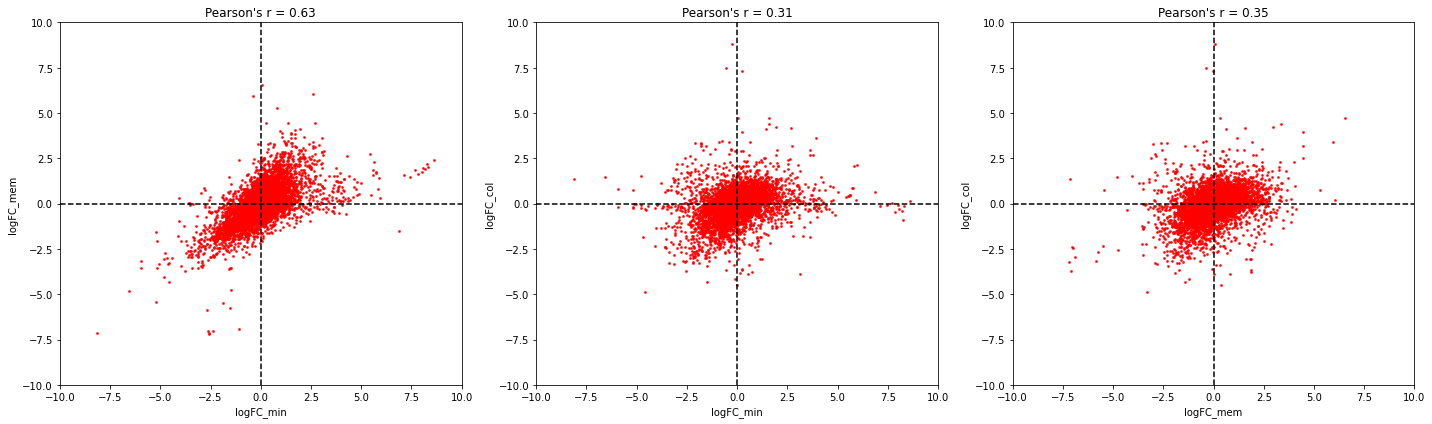

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

# min vs. mem
_ = sns.scatterplot(x="logFC_min", y="logFC_mem", data=df_combined, ax=ax[0], edgecolor=None, s=6, facecolor='red')
_ = ax[0].set_xlim([-10,10])
_ = ax[0].set_ylim([-10,10])
_ = ax[0].plot([0,0],[-10,10],'k--')
_ = ax[0].plot([-10,10],[0,0],'k--')

r = pearsonr(df_combined.logFC_min, df_combined.logFC_mem)[0]
_ = ax[0].set_title('Pearson\'s r = %2.2f'%(r))

# min vs. col
_ = sns.scatterplot(x="logFC_min", y="logFC_col", data=df_combined, ax=ax[1], edgecolor=None, s=6, facecolor='red')
_ = ax[1].set_xlim([-10,10])
_ = ax[1].set_ylim([-10,10])
_ = ax[1].plot([0,0],[-10,10],'k--')
_ = ax[1].plot([-10,10],[0,0],'k--')

r = pearsonr(df_combined.logFC_min, df_combined.logFC_col)[0]
_ = ax[1].set_title('Pearson\'s r = %2.2f'%(r))

# mem vs. col
_ = sns.scatterplot(x="logFC_mem", y="logFC_col", data=df_combined, ax=ax[2], edgecolor=None, s=6, facecolor='red')
_ = ax[2].set_xlim([-10,10])
_ = ax[2].set_ylim([-10,10])
_ = ax[2].plot([0,0],[-10,10],'k--')
_ = ax[2].plot([-10,10],[0,0],'k--')

r = pearsonr(df_combined.logFC_mem, df_combined.logFC_col)[0]
_ = ax[2].set_title('Pearson\'s r = %2.2f'%(r))

plt.tight_layout()